<h2>Display hypsometry data</h2>

In [2]:
%matplotlib notebook

from charistools.modelEnv import ModelEnv
from charistools.hypsometry import Hypsometry
import matplotlib.pyplot as plt
#pylab.rcParams['figure.figsize'] = (16.0, 8.0)

/Users/brodzik/miniconda/envs/charistools/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
tileConfigFile = '/Users/brodzik/charis_training_2015/' + \
'module05_temperature_index_model/modis_tiles_config.ini'
topDir = '/Users/brodzik/projects/CHARIS'
myEnv = ModelEnv(topDir=topDir, tileConfigFile=tileConfigFile, verbose=True)

charistools.modelEnv: read MODIS tile configuration from /Users/brodzik/charis_training_2015/module05_temperature_index_model/modis_tiles_config.ini
charistools.modelEnv: model_top_dir changed to /Users/brodzik/projects/CHARIS
charistools.modelEnv: read MODIS tile configuration from /Users/brodzik/charis_training_2015/module05_temperature_index_model/modis_tiles_config.ini


In [12]:
import os
os.getcwd()

'/Users/brodzik/charis_training_2015/module05_temperature_index_model'

In [3]:
station_tempFile = '/Users/brodzik/projects/CHARIS/forcing_data/Observed/air_temperature/derived/' + \
'v1.0/hunza_observation_tavg_profile_100m.2001.dscale.v1.0.asc'
drainageID = "IN_Hunza_GDBD"
year = 2001
uncorrected_tempFile = myEnv.hypsometry_filename(drainageID=drainageID, type='temperature_by_elevation', year=year)
corrected_tempFile = '/Users/brodzik/projects/CHARIS/forcing_data/Downscaled/ERA-Interim/day/' + \
'corrected/by_elevation/IN_Hunza_GDBD.2001.0100m.corrected.v2.temperature_by_elev.txt'
print station_tempFile
print uncorrected_tempFile
print corrected_tempFile

/Users/brodzik/projects/CHARIS/forcing_data/Observed/air_temperature/derived/v1.0/hunza_observation_tavg_profile_100m.2001.dscale.v1.0.asc
/Users/brodzik/projects/CHARIS/forcing_data/Downscaled/ERA-Interim/day/uncorrected/by_elevation/IN_Hunza_GDBD.2001.0100m.v1.temperature_by_elev.txt
/Users/brodzik/projects/CHARIS/forcing_data/Downscaled/ERA-Interim/day/corrected/by_elevation/IN_Hunza_GDBD.2001.0100m.corrected.v2.temperature_by_elev.txt


In [4]:
station_temp_hyps = Hypsometry(filename=station_tempFile)
uncorrected_temp_hyps = Hypsometry(filename=uncorrected_tempFile)
corrected_temp_hyps = Hypsometry(filename=corrected_tempFile)

In [ ]:
#%ls /Users/brodzik/projects/CHARIS/forcing_data/Downscaled/ERA-Interim/day/corrected/by_elevation


In [5]:
print(station_temp_hyps.data.columns)
print(uncorrected_temp_hyps.data.columns)
print(corrected_temp_hyps.data.columns)

Index([u'1450', u'1550', u'1650', u'1750', u'1850', u'1950', u'2050', u'2150',
       u'2250', u'2350', u'2450', u'2550', u'2650', u'2750', u'2850', u'2950',
       u'3050', u'3150', u'3250', u'3350', u'3450', u'3550', u'3650', u'3750',
       u'3850', u'3950', u'4050', u'4150', u'4250', u'4350', u'4450', u'4550',
       u'4650', u'4750', u'4850', u'4950', u'5050', u'5150', u'5250', u'5350',
       u'5450', u'5550', u'5650', u'5750', u'5850', u'5950', u'6050', u'6150',
       u'6250', u'6350', u'6450', u'6550', u'6650', u'6750', u'6850', u'6950',
       u'7050', u'7150', u'7250', u'7350', u'7450', u'7550', u'7650', u'7750'],
      dtype='object')
Index([u'1400.0', u'1500.0', u'1600.0', u'1700.0', u'1800.0', u'1900.0',
       u'2000.0', u'2100.0', u'2200.0', u'2300.0', u'2400.0', u'2500.0',
       u'2600.0', u'2700.0', u'2800.0', u'2900.0', u'3000.0', u'3100.0',
       u'3200.0', u'3300.0', u'3400.0', u'3500.0', u'3600.0', u'3700.0',
       u'3800.0', u'3900.0', u'4000.0', u'4100.0', u'

<h2>Adjust station temps from Kelvin to degrees-C</h2>

In [6]:
station_temp_hyps.data = station_temp_hyps.data - 273.15
station_temp_hyps.data.describe()

,1450,1550,1650,1750,1850,1950,2050,2150,2250,2350,...,6850,6950,7050,7150,7250,7350,7450,7550,7650,7750
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,16.134795,15.484795,14.834795,14.184795,13.534795,12.884795,12.234795,11.584795,10.934795,10.284795,...,-18.918630,-19.568630,-20.218630,-20.868630,-21.518630,-22.168630,-22.818630,-23.468630,-24.118630,-24.768630
std,8.313342,8.313342,8.313342,8.313342,8.313342,8.313342,8.313342,8.313342,8.313342,8.313342,...,8.327385,8.327385,8.327385,8.327385,8.327385,8.327385,8.327385,8.327385,8.327385,8.327385
min,1.440000,0.790000,0.140000,-0.510000,-1.160000,-1.810000,-2.460000,-3.110000,-3.760000,-4.410000,...,-34.080000,-34.730000,-35.380000,-36.030000,-36.680000,-37.330000,-37.980000,-38.630000,-39.280000,-39.930000
25%,9.040000,8.390000,7.740000,7.090000,6.440000,5.790000,5.140000,4.490000,3.840000,3.190000,...,-26.280000,-26.930000,-27.580000,-28.230000,-28.880000,-29.530000,-30.180000,-30.830000,-31.480000,-32.130000
50%,16.440000,15.790000,15.140000,14.490000,13.840000,13.190000,12.540000,11.890000,11.240000,10.590000,...,-18.680000,-19.330000,-19.980000,-20.630000,-21.280000,-21.930000,-22.580000,-23.230000,-23.880000,-24.530000
75%,23.040000,22.390000,21.740000,21.090000,20.440000,19.790000,19.140000,18.490000,17.840000,17.190000,...,-12.180000,-12.830000,-13.480000,-14.130000,-14.780000,-15.430000,-16.080000,-16.730000,-17.380000,-18.030000
max,31.740000,31.090000,30.440000,29.790000,29.140000,28.490000,27.840000,27.190000,26.540000,25.890000,...,-2.880000,-3.530000,-4.180000,-4.830000,-5.480000,-6.130000,-6.780000,-7.430000,-8.080000,-8.730000


In [7]:
corrected_temp_hyps.data.describe()

,1400.0,1500.0,1600.0,1700.0,1800.0,1900.0,2000.0,2100.0,2200.0,2300.0,...,6800.0,6900.0,7000.0,7100.0,7200.0,7300.0,7400.0,7500.0,7600.0,7700.0
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,17.701452,17.297096,16.626904,16.030795,15.297233,14.784685,14.124438,13.697479,12.919836,12.103260,...,-18.306685,-19.333534,-19.494219,-20.070959,-20.651644,-20.629041,-21.348466,-22.113671,-21.373479,-24.797425
std,8.289469,8.335189,8.355992,8.393407,8.386968,8.382250,8.369800,8.358995,8.361076,8.355695,...,8.751661,8.764587,8.786613,8.784820,8.786821,8.785382,8.804826,8.819884,8.920145,8.799019
min,-0.940000,-1.350000,-2.010000,-2.640000,-3.310000,-3.790000,-4.380000,-4.770000,-5.490000,-6.240000,...,-35.410000,-36.610000,-36.790000,-37.450000,-38.140000,-38.070000,-38.910000,-39.800000,-38.990000,-42.860000
25%,11.000000,10.440000,9.580000,8.900000,8.140000,7.620000,6.990000,6.530000,5.680000,4.800000,...,-26.360000,-27.390000,-27.580000,-28.130000,-28.690000,-28.700000,-29.430000,-30.260000,-29.680000,-32.790000
50%,17.620000,17.170000,16.510000,15.920000,15.200000,14.760000,14.120000,13.760000,12.980000,12.150000,...,-18.230000,-19.250000,-19.410000,-20.010000,-20.590000,-20.590000,-21.280000,-22.040000,-21.360000,-24.650000
75%,25.230000,24.710000,24.260000,23.670000,22.880000,22.450000,21.840000,21.370000,20.560000,19.720000,...,-11.350000,-12.440000,-12.580000,-13.230000,-13.820000,-13.780000,-14.540000,-15.310000,-14.350000,-18.260000
max,35.380000,34.980000,34.280000,33.660000,32.870000,32.300000,31.580000,31.080000,30.260000,29.360000,...,-1.010000,-1.860000,-1.980000,-2.460000,-2.940000,-2.910000,-3.510000,-4.130000,-3.370000,-6.490000


In [8]:
uncorrected_temp_hyps.data.describe()

,1400.0,1500.0,1600.0,1700.0,1800.0,1900.0,2000.0,2100.0,2200.0,2300.0,...,6800.0,6900.0,7000.0,7100.0,7200.0,7300.0,7400.0,7500.0,7600.0,7700.0
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000,365.000000
mean,17.000164,16.401068,15.623507,14.816438,14.063945,13.427205,12.76000,12.223315,11.430411,10.561644,...,-20.204055,-21.288740,-21.331890,-21.965562,-22.641534,-22.738767,-23.36211,-24.264932,-23.166466,-27.265699
std,7.522587,7.568178,7.589203,7.630471,7.626739,7.633017,7.62061,7.614093,7.614409,7.605798,...,7.947641,7.968682,7.976967,7.988620,7.999162,7.996180,8.01156,8.026520,8.045212,8.049260
min,-0.550000,-1.150000,-1.920000,-2.760000,-3.460000,-4.080000,-4.68000,-5.180000,-5.920000,-6.720000,...,-36.150000,-37.420000,-37.450000,-38.200000,-38.990000,-39.040000,-39.78000,-40.790000,-39.480000,-44.230000
25%,10.950000,10.250000,9.410000,8.520000,7.730000,7.050000,6.38000,5.820000,5.010000,4.130000,...,-27.770000,-28.770000,-28.850000,-29.440000,-30.160000,-30.250000,-30.93000,-31.790000,-30.740000,-34.620000
50%,17.320000,16.610000,15.810000,14.940000,14.160000,13.600000,12.96000,12.420000,11.580000,10.630000,...,-19.910000,-20.970000,-21.010000,-21.610000,-22.300000,-22.400000,-23.02000,-23.950000,-22.850000,-26.890000
75%,23.440000,22.950000,22.140000,21.470000,20.720000,20.260000,19.61000,19.180000,18.360000,17.450000,...,-13.790000,-14.950000,-15.000000,-15.690000,-16.440000,-16.550000,-17.23000,-18.250000,-17.000000,-21.390000
max,33.230000,32.650000,31.850000,31.030000,30.220000,29.540000,28.82000,28.220000,27.380000,26.440000,...,-4.380000,-5.270000,-5.290000,-5.810000,-6.370000,-6.460000,-6.97000,-7.730000,-6.740000,-10.320000


In [9]:
station_temp_by_doy = (station_temp_hyps.data_by_doy() / len(station_temp_hyps.data.columns))
corrected_temp_by_doy = corrected_temp_hyps.data_by_doy() / len(corrected_temp_hyps.data.columns)
uncorrected_temp_by_doy = uncorrected_temp_hyps.data_by_doy() / len(uncorrected_temp_hyps.data.columns)

<IPython.core.display.Javascript object>


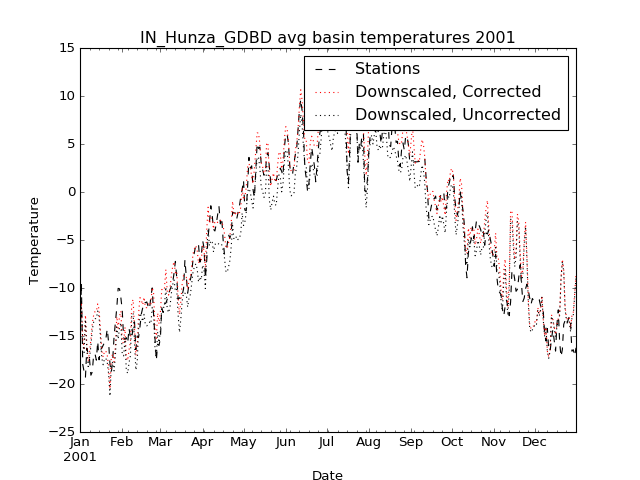

In [10]:
fig, ax = plt.subplots()
station_temp_by_doy.plot(color='k', linestyle='--', \
                         title=drainageID + " avg basin temperatures " + str(year), label='Stations')
corrected_temp_by_doy.plot(color='r', linestyle=':', label='Downscaled, Corrected')
uncorrected_temp_by_doy.plot(color='k', linestyle=':', label='Downscaled, Uncorrected')
ax.set_ylabel('Temperature')
legend = ax.legend()
fig.savefig("/Users/brodzik/charis/IN_Hunza_observed_vs_corrected_downscaled_temps.png")

In [ ]:
len(old_temp_hyps.data[str(3000 + 50)])



<h3> Look at a few sample elevations</h3>


In [ ]:
elevations = [2000, 3000, 4000, 5000, 6000, 7000]
print old_temp_hyps.data
print temp_hyps.data
#print len(old_temp_hyps.data[str(elevations + 50)])
#print len(temp_hyps.data[str(float(elevations))][:-1])


In [ ]:
elevations = [2000, 3000, 4000, 5000, 6000, 7000]
nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows, ncols)

fig.suptitle('IN_Hunza station vs. downscaled temperatures 2001', fontsize=18)
for i, el in enumerate(elevations):
    row = i / ncols
    col = i % ncols
    this_ax = ax[row, col]
    this_ax.scatter(old_temp_hyps.data[str(el + 50)], temp_hyps.data[str(float(el))])
    lims = [
        np.min([this_ax.get_xlim(), this_ax.get_ylim()]),  # min of both axes
        np.max([this_ax.get_xlim(), this_ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    this_ax.plot(lims, lims, 'k-')
    # this_ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    this_ax.set_aspect('equal')
    this_ax.set_xlim(lims)
    this_ax.set_ylim(lims)
    this_ax.set_xlabel('Stations')
    this_ax.set_ylabel('Downscaled')
    this_ax.set_title(str(el))
    
fig.tight_layout()
fig.savefig("IN_Hunza_observed_vs_downscaled_temps.scatter.png")

In [ ]:
station_temp_hyps.data.plot.box(vert=False,positions=np.arange(len(station_temp_hyps.data.columns)),
                                grid=True, title='Stations', label='stations')
uncorrected_temp_hyps.data.plot.box(vert=False, \
                                    grid=True, title='Uncorrected dscale', \
                                    color='k', \
                                    positions=np.arange(len(uncorrected_temp_hyps.data.columns)),label='uncorrected_dscale')
corrected_temp_hyps.data.plot.box(vert=False, \
                                  grid=True, title='Corrected dscale', \
                                  color='r', \
                                  positions=np.arange(len(corrected_temp_hyps.data.columns)),label='corrected_dscale')

#for i, el in enumerate(station_temp_hyps.data.columns):
#    if i < 2:
#        x = station_temp_hyps.data[el].values
#        y.fill(int(el))
#        ax.plot()


<IPython.core.display.Javascript object>


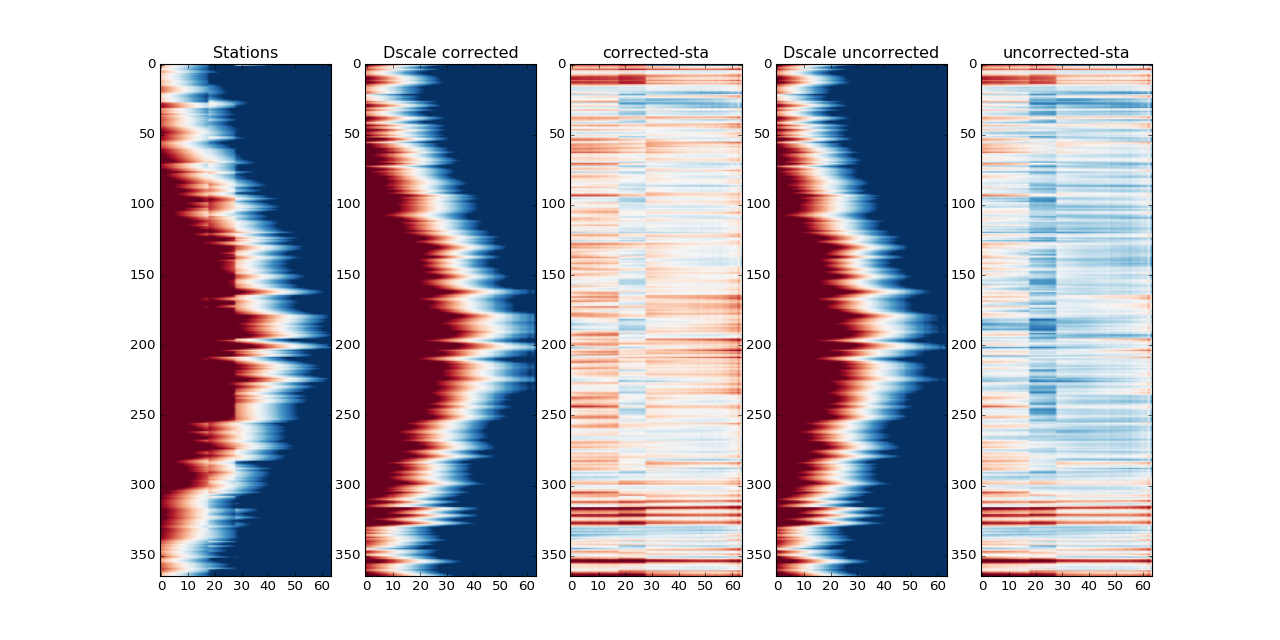

In [11]:
clim=(-10,10)
fig, ax = plt.subplots(1,5, figsize=(16,8))
ax[0].imshow(station_temp_hyps.data.values, cmap='RdBu_r', aspect='auto', clim=clim)
ax[0].set_title('Stations')
ax[1].imshow(corrected_temp_hyps.data.values, cmap='RdBu_r', aspect='auto', clim=clim)
ax[1].set_title('Dscale corrected')
ax[2].imshow(corrected_temp_hyps.data.values - station_temp_hyps.data.values, cmap='RdBu_r', aspect='auto', clim=clim)
ax[2].set_title('corrected-sta')
ax[3].imshow(uncorrected_temp_hyps.data.values, cmap='RdBu_r', aspect='auto', clim=clim)
ax[3].set_title('Dscale uncorrected')
ax[4].imshow(uncorrected_temp_hyps.data.values - station_temp_hyps.data.values, cmap='RdBu_r', aspect='auto', clim=clim)
ax[4].set_title('uncorrected-sta')

<h2>Read the 3-surface partition files for this year</h2>

In [15]:
%cat /Users/brodzik/charis_training_2015/iPython_notebooks/temp_index_model/modis_tiles_config.ini

# Data processing configuration for MODIS-tile data
# used by CHARIS melt modeling
#
# Each section thereafter contains information for reading
# a type of data, including
#
# directory, filename pattern and expected data type (byte, float)
# Expected data type is only needed for flat binary data,
# since tif, h5 and nc file readers will take care of type issues

model_top_dir = ~/projects/CHARIS/

# Input data filename patterns   
[input]

    # Model forcing data that varies by time (annual, daily)
    [[forcing]]

        # Location of annual cubes of daily MODSCAG_GF (gap-filled modscag) snow data
	[[[modscag_gf]]]
	dir = %MODEL_TOP_DIR%/snow_cover/MODSCAG_GF/v05/%TILEID%/
	pattern = MODSCAG_GF_Snow.v0.5.%TILEID%_%YYYY%.h5

        # Location of annual cubes of daily grain size from
	# MODSCAG_GF (gap-filled modscag) snow data
	[[[grsize_scag]]]
	dir = %MODEL_TOP_DIR%/grain_size/MODSCAG_GF/v05/%TILEID%/
	pattern = MODSCAG_GF_GrainSize.v0.5.%TILEID%_%YYYY%.h5

	# Location of downsca

In [25]:
EGIFile = myEnv.hypsometry_filename(drainageID=drainageID, type='exposed_glacier_ice_by_elevation',year=2001,threshold=205)
EGIFile

'/Users/brodzik/projects/CHARIS/surface_area/by_elevation/IN_Hunza_GDBD.2001.0100m.GRSIZE_SCAG.0205.exposed_glacier_ice_area_by_elev.txt'

In [19]:
SOLFile = myEnv.hypsometry_filename(drainageID=drainageID, type='snow_on_land_by_elevation', year=2001)
SOLFile

'/Users/brodzik/projects/CHARIS/surface_area/by_elevation/IN_Hunza_GDBD.2001.0100m.snow_on_land_area_by_elev.txt'

In [21]:
SOIFile = myEnv.hypsometry_filename(drainageID=drainageID, type='snow_on_ice_by_elevation', year=2001,threshold=205)
SOIFile

'/Users/brodzik/projects/CHARIS/surface_area/by_elevation/IN_Hunza_GDBD.2001.0100m.GRSIZE_SCAG.0205.snow_on_ice_area_by_elev.txt'

In [26]:
egi_hyps = Hypsometry(filename=EGIFile)
sol_hyps = Hypsometry(filename=SOLFile)
soi_hyps = Hypsometry(filename=SOIFile)

In [27]:
egi_hyps.data

,2900.0,3000.0,3100.0,3200.0,3300.0,3400.0,3500.0,3600.0,3700.0,3800.0,...,6800.0,6900.0,7000.0,7100.0,7200.0,7300.0,7400.0,7500.0,7600.0,7700.0
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.21,...,0.40,0.00,0.18,0.20,0.19,0.18,0.17,0.00,0.20,0.0
2001-01-02,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.21,...,0.40,0.00,0.00,0.18,0.19,0.18,0.17,0.00,0.18,0.0
2001-01-03,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.39,0.17,0.20,0.17,0.19,0.18,0.17,0.00,0.17,0.0
2001-01-04,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.38,0.18,0.20,0.00,0.19,0.18,0.18,0.00,0.17,0.0
2001-01-05,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.38,0.18,0.19,0.00,0.19,0.18,0.19,0.00,0.17,0.0
2001-01-06,0.00,0.0,0.00,0.00,0.35,0.00,0.00,0.00,0.00,0.00,...,0.38,0.17,0.19,0.00,0.18,0.19,0.20,0.00,0.00,0.0
2001-01-07,0.00,0.0,0.00,0.00,0.36,0.00,0.00,0.00,0.00,0.00,...,0.17,0.16,0.00,0.00,0.38,0.19,0.20,0.00,0.00,0.0
2001-01-08,0.00,0.0,0.00,0.00,0.35,0.00,0.00,0.00,0.00,0.00,...,0.16,0.15,0.00,0.19,0.38,0.19,0.37,0.00,0.00,0.0
2001-01-09,0.00,0.0,0.00,0.00,0.35,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.19,0.37,0.19,0.37,0.18,0.19,0.0


In [28]:
sol_hyps.data

,1400.0,1500.0,1600.0,1700.0,1800.0,1900.0,2000.0,2100.0,2200.0,2300.0,...,5800.0,5900.0,6000.0,6100.0,6200.0,6300.0,6400.0,6500.0,6600.0,6700.0
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.09,0.22,1.15,...,1.15,0.20,0.64,0.02,0.37,0.52,0.44,0.22,0.05,0.06
2001-01-02,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.09,0.22,1.15,...,1.14,0.21,0.64,0.02,0.38,0.49,0.45,0.21,0.05,0.06
2001-01-03,0.0,0.0,0.0,0.0,0.0,0.00,0.02,0.13,0.21,1.18,...,1.14,0.21,0.65,0.02,0.39,0.46,0.46,0.21,0.05,0.07
2001-01-04,0.0,0.0,0.0,0.0,0.0,0.02,0.03,0.14,0.21,1.16,...,1.14,0.23,0.65,0.02,0.41,0.45,0.50,0.21,0.03,0.08
2001-01-05,0.0,0.0,0.0,0.0,0.0,0.02,0.04,0.15,0.21,1.14,...,1.14,0.25,0.66,0.02,0.43,0.45,0.54,0.21,0.03,0.08
2001-01-06,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.17,0.20,1.11,...,1.13,0.27,0.65,0.02,0.46,0.45,0.60,0.22,0.03,0.08
2001-01-07,0.0,0.0,0.0,0.0,0.0,0.00,0.02,0.15,0.20,1.03,...,1.12,0.32,0.66,0.02,0.47,0.45,0.65,0.23,0.05,0.09
2001-01-08,0.0,0.0,0.0,0.0,0.0,0.00,0.02,0.14,0.20,0.90,...,1.12,0.34,0.67,0.02,0.45,0.46,0.69,0.23,0.05,0.09
2001-01-09,0.0,0.0,0.0,0.0,0.0,0.00,0.04,0.09,0.17,0.80,...,1.12,0.35,0.70,0.03,0.41,0.48,0.71,0.23,0.06,0.09


In [29]:
soi_hyps.data

,2900.0,3000.0,3100.0,3200.0,3300.0,3400.0,3500.0,3600.0,3700.0,3800.0,...,6800.0,6900.0,7000.0,7100.0,7200.0,7300.0,7400.0,7500.0,7600.0,7700.0
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,0.18,0.38,0.94,2.26,2.82,3.57,4.40,5.63,4.71,6.71,...,13.31,11.80,7.74,8.20,6.18,3.14,2.26,2.44,0.84,0.15
2001-01-02,0.17,0.38,0.88,2.21,2.72,3.54,4.30,5.43,4.65,6.48,...,13.29,11.66,7.91,8.26,6.15,3.15,2.20,2.37,0.83,0.14
2001-01-03,0.15,0.36,0.84,2.16,2.66,3.53,4.23,5.26,4.58,6.53,...,13.28,11.45,7.73,8.37,6.15,3.15,2.17,2.29,0.83,0.13
2001-01-04,0.14,0.33,0.80,2.14,2.68,3.57,4.27,5.21,4.54,6.52,...,13.32,11.48,7.76,8.58,6.19,3.17,2.16,2.28,0.83,0.13
2001-01-05,0.14,0.32,0.79,2.12,2.73,3.63,4.35,5.33,4.55,6.62,...,13.39,11.58,7.80,8.59,6.21,3.19,2.19,2.31,0.84,0.13
2001-01-06,0.14,0.31,0.81,2.13,2.43,3.68,4.45,5.56,4.63,6.81,...,13.46,11.69,7.86,8.58,6.25,3.20,2.21,2.36,1.02,0.14
2001-01-07,0.14,0.32,0.85,2.17,2.47,3.74,4.51,5.76,4.72,6.99,...,13.68,11.79,8.07,8.55,6.07,3.21,2.24,2.42,1.03,0.15
2001-01-08,0.15,0.32,0.88,2.25,2.51,3.76,4.51,5.84,4.78,7.07,...,13.65,11.84,8.06,8.28,6.06,3.20,2.09,2.48,1.04,0.15
2001-01-09,0.15,0.33,0.89,2.29,2.51,3.77,4.46,5.80,4.78,7.10,...,13.69,11.97,8.00,8.17,6.06,3.17,2.10,2.35,0.85,0.16
